<a href="https://colab.research.google.com/github/jonathannocek/pga-data-analysis/blob/master/pga_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PGA Data Analysis**
By: Jonathan Nocek

Date: November 2019

## **Overview**

As a golf fanatic, a college player, and data scientist, I will try to answer the question: What makes PGA tour player so good? More specifically, I will try to find the differences in the games of a PGA Tour and the game of myself and teammates at Illinois Wesleyan University. I will also analyze player improvement at the college and PGA tour level respectively. 

Our golf team at IWU has enjoyed much success during my time at school. This all culuminated in winning the 2019 DIII National Championship and currently being ranked first in DIII for the 2019-2020 season. While being DIII, our team operates much like a DI team and currently boasts the 17th best adjusted scoring average according to Golfstat across all of the NCAA. 

So what separates the players of a successful college golf team and those of the PGA tour? Secondly, what separates the average PGA tour pro who is fighting for his PGA Tour card every year from the top players in the world. This project to answer these questions and show the differences materially.

### **Dataframe**

Currently, I have two different datasets that contain the statistics for PGA Tour players and the Illinois Wesleyan players respectively.  

The statistics for the PGA Tour players were collected through a data scraping notebook that accesses the data from the [PGA Tour](https://www.pgatour.com/stats.html). The archives provide hundreds of statistics for the past seasons. I have selected a variety of statistics and have selected to utilize the 2010-2019 PGA Tour seasons. I modified [this](https://github.com/daronprater/PGA-Tour-Data-Science-Project/blob/master/PGAtour.com%20Web%20Scraper.ipynb) notebook to collect these statistics.

For the IWU Golf statistics, our team uses [BirdieFire](https://birdiefire.com/) as a statistics portal. After each round, we enter our round into the site and we are given a simple analysis of our round. The cumulitive stats are also kept on the site. I have chosen to select the top 10 players by scoring average for each season dating back to the 2017-2018 season for my analysis.

### **Variables**
Descriptions taken from the PGA TOUR's website. The Strokes Gained concept can confusing so [here](https://www.pgatour.com/news/2016/05/31/strokes-gained-defined.html) is a detailed explanation of the statistic. It has revolutionized golf statistics and has provided significant insight as to how a player analyzes their game. 

The Strokes Gained - concept is a by-product of the PGA TOUR's ShotLink Intelligence Program, which encourages academics to perform research against ShotLink statistical data. Professor Mark Broadie from Columbia Business School developed the early concept which was later refined by the TOUR.

*   **NAME** - The name of the golfer
*   **ROUNDS** - The number of rounds played in the given season
*   **SCORING** - The weighted scoring average which takes the stroke average of the field into account. It is computed by adding a player's total strokes to an adjustment and dividing by the total rounds played. The adjustment is computed by determining the stroke average of the field for each round played. This average is subtracted from par to create an adjustment for each round. A player accumulates these adjustments for each round played.
*   **DRIVE_DISTANCE** - The average number of yards per measured drive. These drives are measured on two holes per round. Care is taken to select two holes which face in opposite directions to counteract the effect of wind. Drives are measured to the point at which they come to rest regardless of whether they are in the fairway or not 
*   **FWY_%** - The percentage of time a tee shot comes to rest in the fairway (regardless of club).
*   **GIR_%** - The percent of time a player was able to hit the green in regulation (greens hit in regulation/holes played). Note: A green is considered hit in regulation if any portion of the ball is touching the putting surface after the GIR stroke has been taken. (The GIR stroke is determined by subtracting 2 from par (1st stroke on a par 3, 2nd on a par 4, 3rd on a par 5))
*   **SG_P (Strokes Gained Putting)** - The number of putts a player takes from a specific distance is measured against a statistical baseline to determine the player's strokes gained or lost on a hole. The sum of the values for all holes played in a round minus the field average strokes gained/lost for the round is the player's Strokes gained/lost for that round. The sum of strokes gained for each round are divided by total rounds played. 
*   **SG_ATG (Strokes Gained Around the Green)** - The number of Around the Green strokes a player takes from specific locations and distances are measured against a statistical baseline to determine the player's strokes gained or lost on a hole. 
*   **SG_APP (Strokes Gained Approach)** - The number of Approach the Green strokes a player takes from specific locations and distances are measured against a statistical baseline to determine the player's strokes gained or lost on a hole. 
*   **SG_OTT (Strokes Gained Off the Tee)** - The number of strokes a player takes from a specific distance off the tee on Par 4 & par 5's is measured against a statistical baseline to determine the player's strokes gained or lost off the tee on a hole. 
*   **SG_TTG (Strokes Gained Tee to Green)** - The per round average of the number of Strokes the player was better or worse than the field average on the same course & event minus the Players Strokes Gained putting value. 
*   **SG_T (Strokes Gained Total)** - The per round average of the number of Strokes the player was better or worse than the field average on the same course & event.
*   **PAR3 (Par 3 Scoring)** - The average score on all par 3's played (e.g. 3.22)
*   **PAR4 (Par 4 Scoring)** - The average score on all par 4's played (e.g. 4.22)
*   **PAR5 (Par 5 Scoring)** - The average score on all par 5's played (e.g. 5.22)
*   **POINTS** - Total number of FedEx Cup points
*   **TOP 10** - The number of top 10 finishes
*   **1ST** - The number of tournaments won
*   **YEAR** - The year of the season for the statistics
*   **UD_%** - A subjective stat.  Most college programs define it as a short shot (i.e. a pitch or chip shot) and the percentage of time that they get the ball up and down, or a chip and a putt.
*   **SS_%** - The percent of time a player was able to get 'up and down' once in a greenside sand bunker (regardless of score). Note: 'Up and down' indicates it took the player 2 shots or less to put the ball in the hole from that point.
*   **SCRAM_%** - The percent of time a player misses the green in regulation, but still makes par or better. 
*   **PUTTS** - The average number of putts taken during a round.
*   **1PUTT_%** - The percentage of holes a player one putts
*   **2PUTT_%** - The percentage of holes a player two putts
*   **3PUTT_%** - The percentage of holes a player three putts

### **Questions**

1. What is the difference between a college golfer and a PGA TOUR golfer?
2. What is the difference between an average PGA TOUR golfer and the best players on TOUR?
3. Examine improvement rates for a college player versus a PGA TOUR player. 


## **Installation**

The following installs the necessary packages and collects the dataset from your Google Drive. The dataset will be publically available on GitHub. (todo)

In [2]:
# Importing necessary packages
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt

# Downloading dataset
from google.colab import drive
# Will prompt for authentication
drive.mount('/content/drive')

# Using pandas to create dataframe by reading csv from my google drive
df_iwu = pd.read_csv('drive/My Drive/2017_2019_IWU_Stats.csv')
df_pga = pd.read_csv('drive/My Drive/2010_2019_PGA_Stats.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## **PGA Descriptives**

In [4]:
df_pga.head(5)

,Unnamed: 0,NAME,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_ATG,SG_APP,SG_OTT,SG_TTG,SG_T,PAR3,PAR4,PAR5,POINTS,TOP 10,1ST,Year
0,0,Matt Kuchar,97,69.606,286.9,67.89,69.36,0.648,0.334,0.336,0.158,0.827,1.461,3.02,3.96,4.56,"2,728",11.0,1.0,2010
1,1,Steve Stricker,73,69.660,282.9,68.50,68.29,0.437,0.419,0.773,0.191,1.383,1.818,2.99,3.99,4.58,"2,028",9.0,2.0,2010
2,2,Retief Goosen,75,69.718,291.4,64.79,65.96,0.679,0.395,0.185,0.337,0.917,1.598,3.04,3.99,4.60,"1,360",10.0,NaN,2010
3,3,Paul Casey,64,69.720,294.2,61.31,68.68,0.812,-0.111,0.483,0.215,0.587,1.411,3.03,3.98,4.64,"2,250",7.0,NaN,2010
4,4,Jim Furyk,76,69.828,276.0,71.01,67.12,0.402,0.367,0.641,0.150,1.159,1.564,3.02,3.99,4.70,"2,980",7.0,3.0,2010


In [5]:
df_pga.describe()

,Unnamed: 0,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_ATG,SG_APP,SG_OTT,SG_TTG,SG_T,PAR3,PAR4,PAR5,TOP 10,1ST,Year
count,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1540.000000,346.000000,1866.000000
mean,92.866559,78.536442,70.928275,291.188317,61.561233,65.760434,0.025907,0.020539,0.063602,0.039167,0.123757,0.149409,3.061983,4.045573,4.668087,3.249351,1.268786,2014.508039
std,53.994527,14.114811,0.696754,8.940325,5.074183,2.718002,0.342443,0.222442,0.381321,0.376575,0.644143,0.695441,0.044247,0.038720,0.068954,2.313653,0.672445,2.894978
min,0.000000,45.000000,68.698000,266.400000,43.020000,53.540000,-1.475000,-0.930000,-1.680000,-1.717000,-3.340000,-3.209000,2.930000,3.930000,4.420000,1.000000,1.000000,2010.000000
25%,46.000000,69.000000,70.504500,285.200000,58.042500,63.960000,-0.185750,-0.124000,-0.180750,-0.184000,-0.263000,-0.254000,3.030000,4.020000,4.620000,1.000000,1.000000,2012.000000
50%,93.000000,79.000000,70.911500,290.900000,61.535000,65.925000,0.040000,0.023500,0.081000,0.056000,0.135500,0.147500,3.060000,4.040000,4.670000,3.000000,1.000000,2015.000000
75%,139.000000,89.000000,71.348750,296.800000,65.060000,67.660000,0.256000,0.176000,0.312000,0.285750,0.525000,0.566500,3.090000,4.070000,4.710000,4.000000,1.000000,2017.000000
max,192.000000,122.000000,74.400000,319.700000,76.880000,73.520000,1.130000,0.660000,1.533000,1.485000,2.347000,2.551000,3.220000,4.250000,4.930000,15.000000,5.000000,2019.000000


In [6]:
df_pga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1866 entries, 0 to 1865
Data columns (total 20 columns):
Unnamed: 0        1866 non-null int64
NAME              1866 non-null object
ROUNDS            1866 non-null int64
SCORING           1866 non-null float64
DRIVE_DISTANCE    1866 non-null float64
FWY_%             1866 non-null float64
GIR_%             1866 non-null float64
SG_P              1866 non-null float64
SG_ATG            1866 non-null float64
SG_APP            1866 non-null float64
SG_OTT            1866 non-null float64
SG_TTG            1866 non-null float64
SG_T              1866 non-null float64
PAR3              1866 non-null float64
PAR4              1866 non-null float64
PAR5              1866 non-null float64
POINTS            1861 non-null object
TOP 10            1540 non-null float64
1ST               346 non-null float64
Year              1866 non-null int64
dtypes: float64(15), int64(3), object(2)
memory usage: 291.7+ KB


The missing values below are okay. This simply means that the players with a nan value did not finish inside the top of win a golf tournament in the given year. 

In [7]:
df_pga.isna().sum()

Unnamed: 0           0
NAME                 0
ROUNDS               0
SCORING              0
DRIVE_DISTANCE       0
FWY_%                0
GIR_%                0
SG_P                 0
SG_ATG               0
SG_APP               0
SG_OTT               0
SG_TTG               0
SG_T                 0
PAR3                 0
PAR4                 0
PAR5                 0
POINTS               5
TOP 10             326
1ST               1520
Year                 0
dtype: int64

## **IWU Descriptives**

In [9]:
df_iwu.head(5)

,Unnamed: 0,NAME,ROUNDS,SCORING,FWY_%,GIR_%,UD_%,SS_%,SCRAM_%,PUTTS,1PUTT_%,2PUTT_%,3PUTT_%,SGP,BB,PAR3,PAR4,PAR5,YEAR
0,0,Conner O'Neil,20,72.00,0.62,0.65,0.61,0.52,0.42,29.20,0.40,0.56,0.04,0.36,0.15,3.05,4.09,4.82,2017
1,1,Rob Wuethrich,25,73.04,0.62,0.66,0.51,0.49,0.35,31.16,0.31,0.64,0.05,-0.47,0.17,3.18,4.15,4.80,2017
2,2,Drew Pershing,10,73.30,0.51,0.60,0.56,0.51,0.55,29.60,0.37,0.60,0.03,-0.68,0.21,3.23,4.16,4.82,2017
3,3,Daniel Cole,12,73.42,0.54,0.55,0.59,0.46,0.20,30.80,0.34,0.60,0.06,-1.75,0.14,3.16,4.12,5.05,2017
4,4,Ben Johnson,21,73.52,0.58,0.64,0.56,0.46,0.35,30.33,0.35,0.61,0.04,-0.92,0.21,3.05,4.20,4.91,2017


In [30]:
df_iwu.describe().round(2)

,ROUNDS,SCORING,FWY_%,GIR_%,UD_%,SS_%,SCRAM_%,PUTTS,1PUTT_%,2PUTT_%,3PUTT_%,SGP,BB,PAR3,PAR4,PAR5,YEAR
count,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00
mean,19.12,73.76,0.57,0.63,0.54,0.47,0.39,30.79,0.34,0.61,0.06,-1.49,0.16,3.24,4.17,4.87,2018.03
std,7.60,1.41,0.06,0.05,0.07,0.06,0.14,0.91,0.04,0.03,0.02,0.86,0.04,0.12,0.08,0.11,0.82
min,5.00,69.80,0.42,0.51,0.35,0.34,0.00,29.20,0.25,0.53,0.03,-3.54,0.08,2.99,3.94,4.65,2017.00
25%,13.75,72.92,0.53,0.60,0.51,0.44,0.33,30.20,0.31,0.59,0.05,-1.99,0.14,3.14,4.12,4.80,2017.00
50%,19.00,73.92,0.56,0.64,0.54,0.47,0.38,30.79,0.34,0.61,0.06,-1.40,0.15,3.24,4.18,4.86,2018.00
75%,25.00,74.56,0.61,0.66,0.58,0.50,0.48,31.19,0.36,0.63,0.07,-0.97,0.19,3.33,4.20,4.91,2019.00
max,32.00,77.00,0.73,0.72,0.68,0.66,0.59,32.83,0.42,0.69,0.10,0.36,0.22,3.47,4.38,5.08,2019.00


In [12]:
df_iwu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 19 columns):
Unnamed: 0    32 non-null int64
NAME          32 non-null object
ROUNDS        32 non-null int64
SCORING       32 non-null float64
FWY_%         32 non-null float64
GIR_%         32 non-null float64
UD_%          32 non-null float64
SS_%          32 non-null float64
SCRAM_%       32 non-null float64
PUTTS         32 non-null float64
1PUTT_%       32 non-null float64
2PUTT_%       32 non-null float64
3PUTT_%       32 non-null float64
SGP           32 non-null float64
BB            32 non-null float64
PAR3          32 non-null float64
PAR4          32 non-null float64
PAR5          32 non-null float64
YEAR          32 non-null int64
dtypes: float64(15), int64(3), object(1)
memory usage: 4.9+ KB


In [13]:
df_iwu.isna().sum()

Unnamed: 0    0
NAME          0
ROUNDS        0
SCORING       0
FWY_%         0
GIR_%         0
UD_%          0
SS_%          0
SCRAM_%       0
PUTTS         0
1PUTT_%       0
2PUTT_%       0
3PUTT_%       0
SGP           0
BB            0
PAR3          0
PAR4          0
PAR5          0
YEAR          0
dtype: int64

## **Data Cleaning**

One problem with the data set above is that it contains an extra column from the key in the csv file. We can simply drop this column entirely.

In [0]:
df_pga = df_pga.drop('Unnamed: 0', 1) # Drop leftover column with old key
df_iwu = df_iwu.drop('Unnamed: 0', 1) # Drop leftover column with old key

One problem with the IWU Golf dataframe was that it contained percetnages making the columns objects instead of the floats. Here, I convert them to floats so I can run analysis on them.

## **Examining Basic Relationships**

Here, we can start to see which statistics are the most important to your scoring average. One thing to consider is whether these datasets have a normal distribution as the correlation statistic relies on that. 
1. Strokes Gained Total is highly correlated with Scoring Average. This makes sense as SG Total is essientally a more advanced Scoring Average statisic.
2. One interesting thing to look at is the differences between correlation between the different aspects of a golfer's game. (SG-Off the Tee, SG-Approach, SG-Around the Green, SG-Putting) Out of these four, SG-Approach is the most correlated with Scoring Average which would suggest that your approaches are the most important aspect of scoring low. SG-Putting is the lowest of the four, so this would suggest that putting is the least important part of scoring well. 
3. Par4 scoring is more important than Par3 and Par5 scoring, however, this is misleading since there is typically more Par4 each round than Par3s and Par5s. 
4. It is interesting to see how unimportant hitting the fairway is to scoring average. There is little to no correlation. 

In [15]:
df_pga.corr()['SCORING'].abs().sort_values(ascending=False)

SCORING           1.000000
SG_T              0.961919
SG_TTG            0.843351
PAR4              0.772185
TOP 10            0.746212
SG_APP            0.669049
PAR5              0.609346
SG_OTT            0.531756
1ST               0.506649
GIR_%             0.472150
PAR3              0.422242
SG_ATG            0.392675
SG_P              0.368322
ROUNDS            0.313869
DRIVE_DISTANCE    0.268931
FWY_%             0.166997
Year              0.008546
Name: SCORING, dtype: float64

In [16]:
df_iwu.corr()['SCORING'].abs().sort_values(ascending=False)

SCORING    1.000000
PAR4       0.902492
PAR3       0.701051
GIR_%      0.653731
PAR5       0.651304
SS_%       0.650683
3PUTT_%    0.621748
PUTTS      0.508139
SGP        0.507851
UD_%       0.447673
BB         0.377488
1PUTT_%    0.364743
SCRAM_%    0.296642
ROUNDS     0.285395
YEAR       0.254699
FWY_%      0.185833
2PUTT_%    0.102616
Name: SCORING, dtype: float64

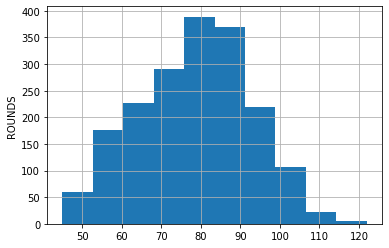

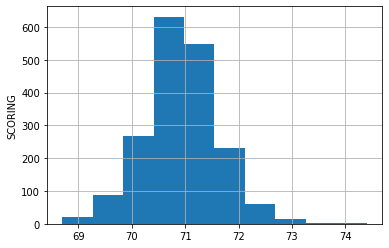

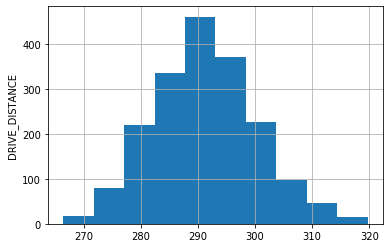

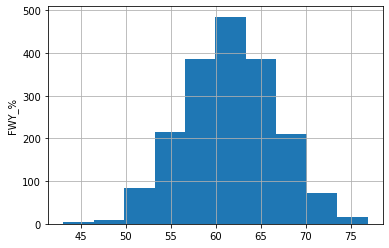

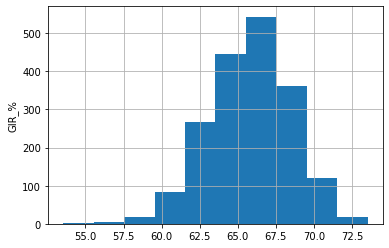

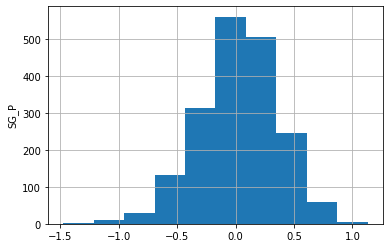

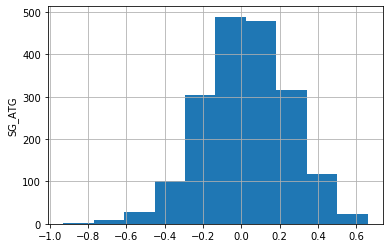

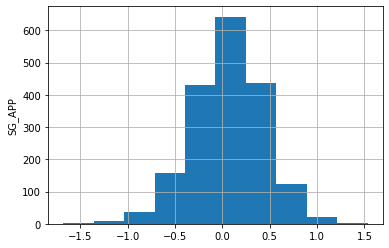

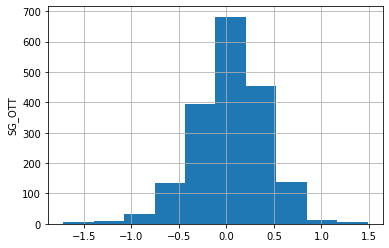

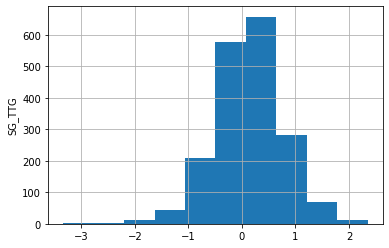

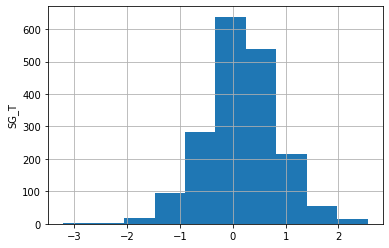

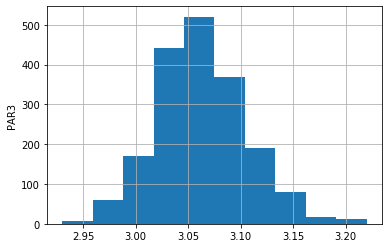

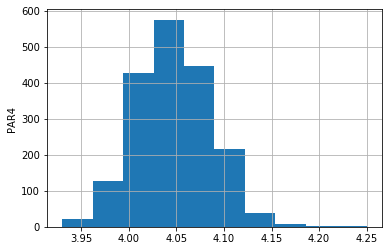

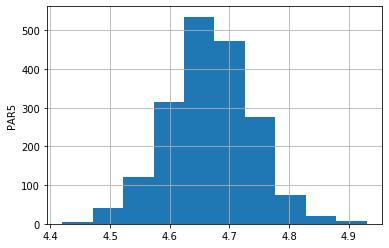

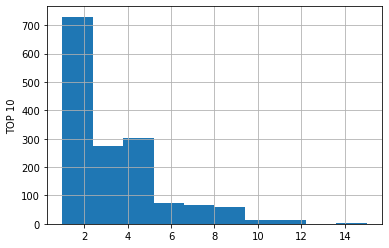

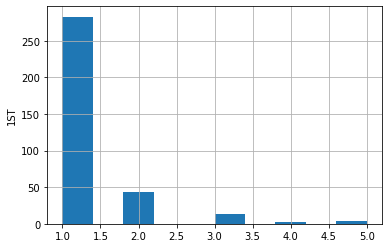

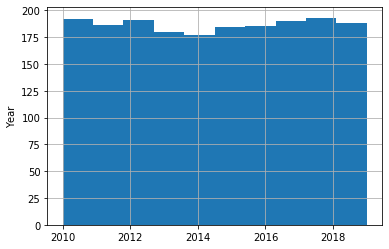

In [19]:
# Find only the numeric columns
numeric_cols = df_pga.select_dtypes(['int64', 'float64']).columns
for col in numeric_cols:
    df_pga[col].hist()
    plt.ylabel(col)
    plt.show()

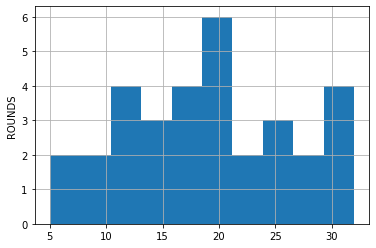

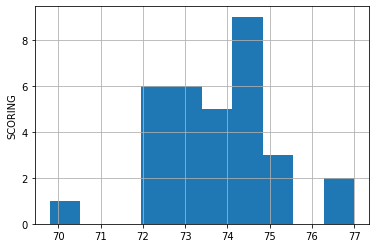

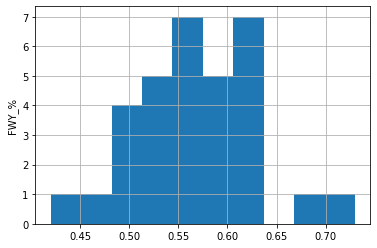

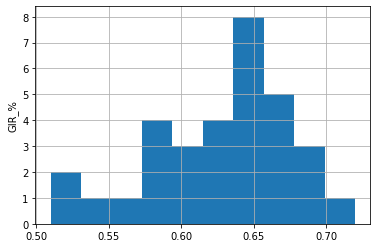

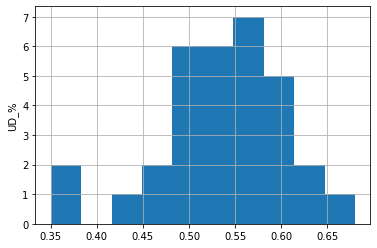

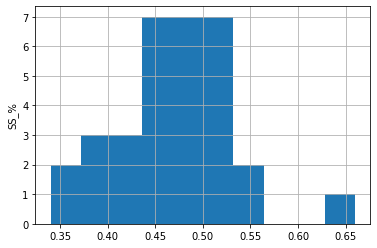

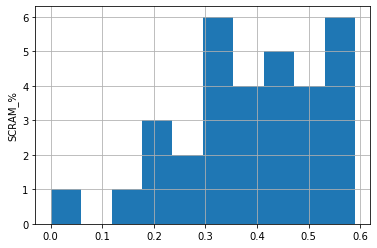

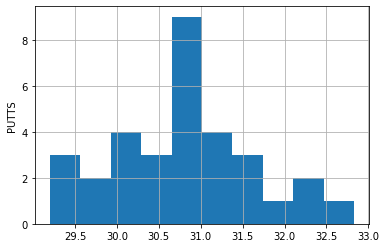

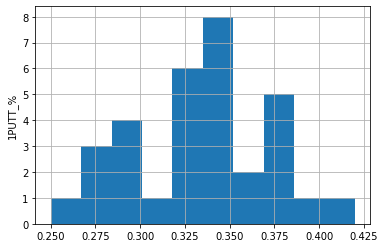

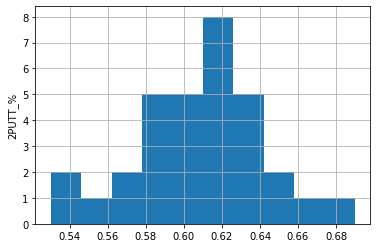

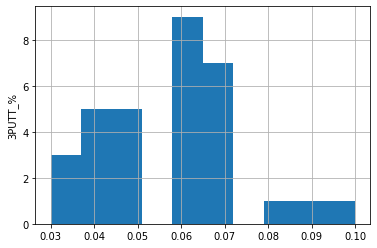

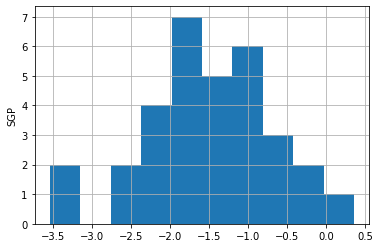

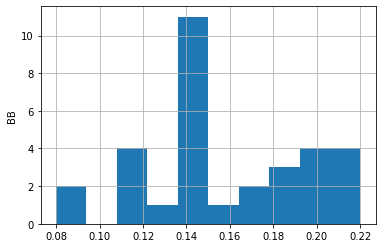

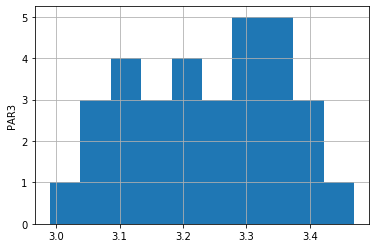

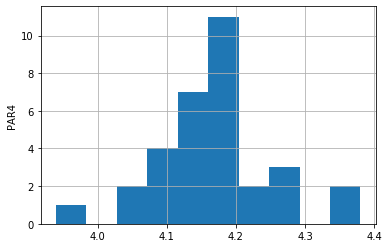

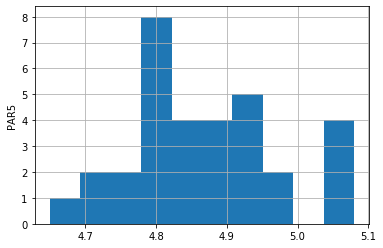

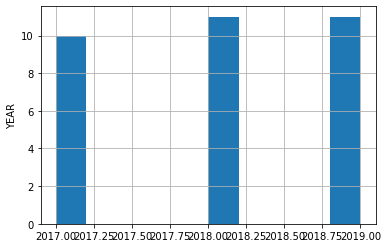

In [20]:
# Find only the numeric columns
numeric_cols = df_iwu.select_dtypes(['int64', 'float64']).columns
for col in numeric_cols:
    df_iwu[col].hist()
    plt.ylabel(col)
    plt.show()

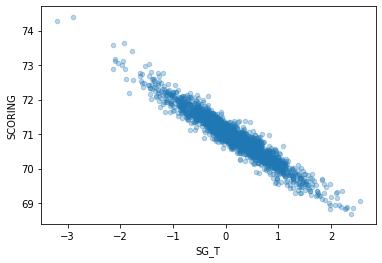

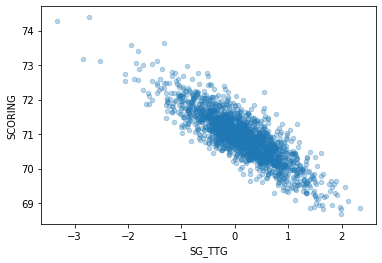

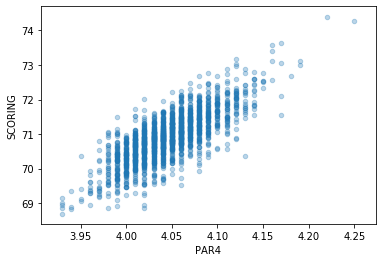

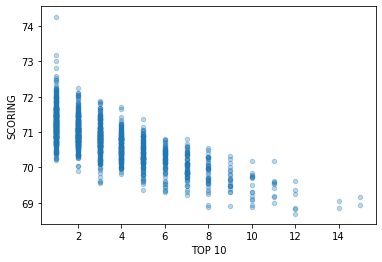

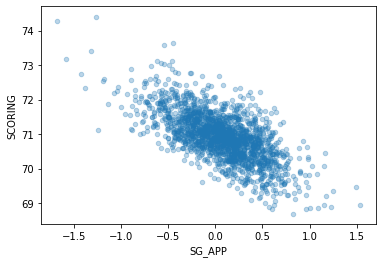

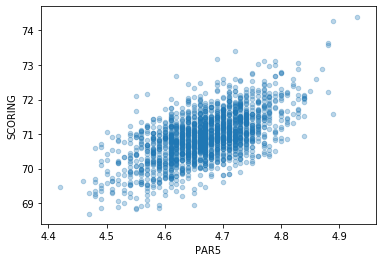

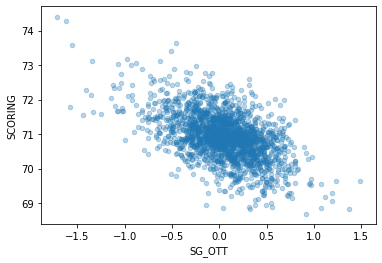

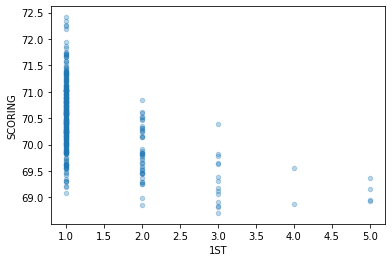

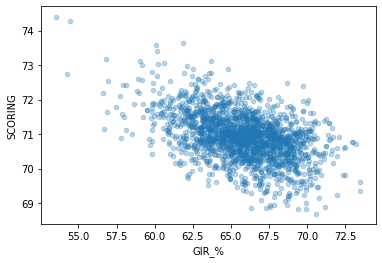

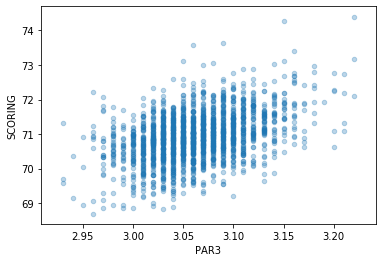

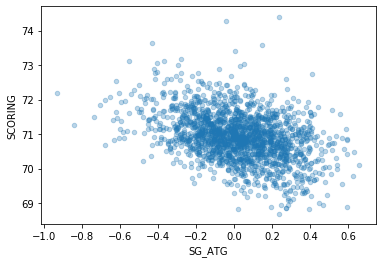

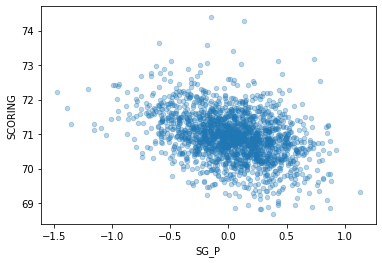

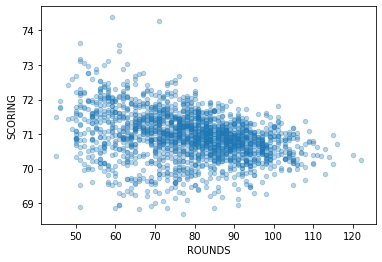

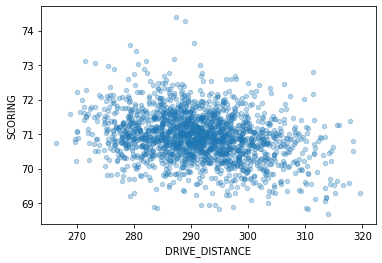

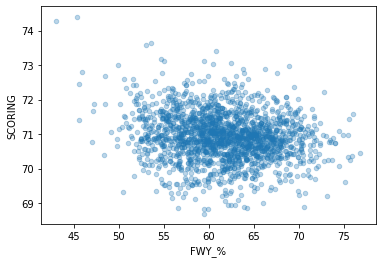

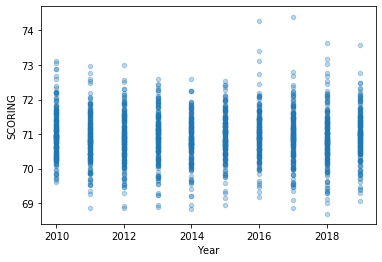

In [26]:
for predictor in df_pga.corr()['SCORING'].abs().sort_values(ascending=False).index[1:]:
  df_pga.plot.scatter(predictor, 'SCORING', alpha =0.3)
  plt.show()

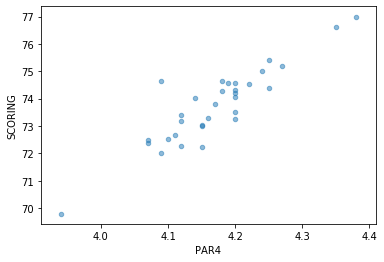

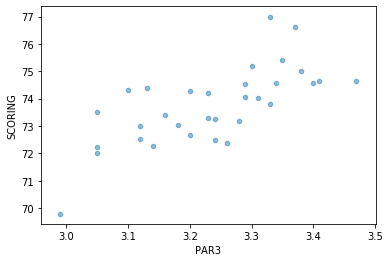

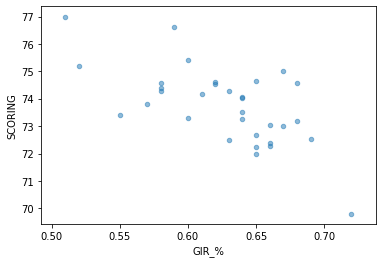

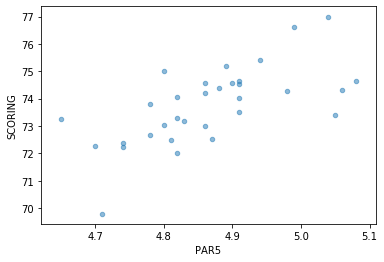

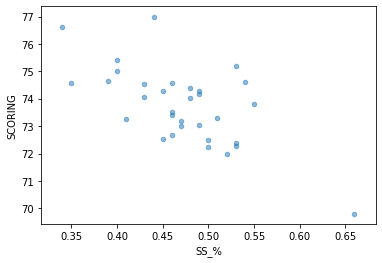

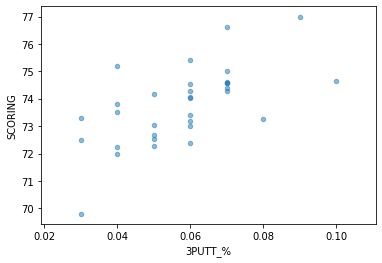

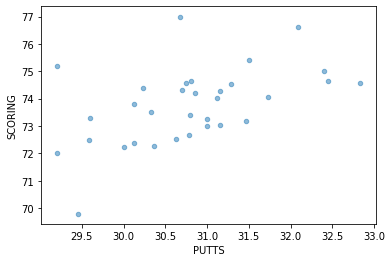

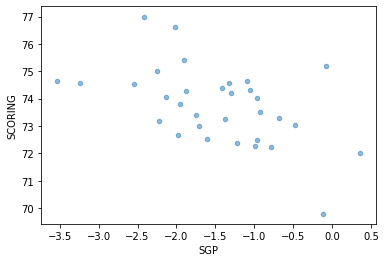

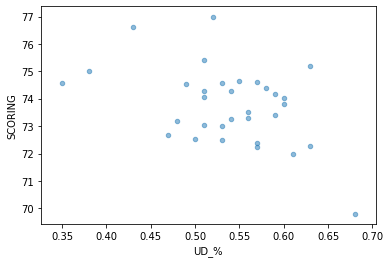

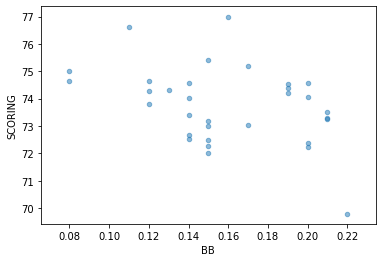

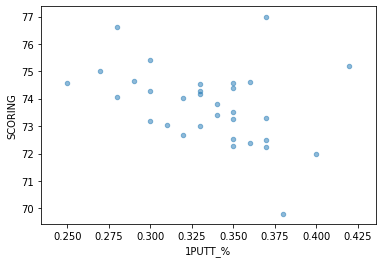

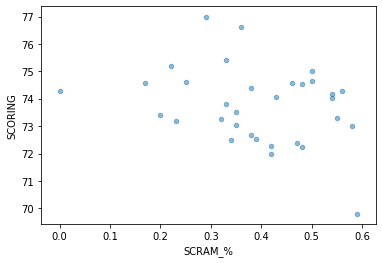

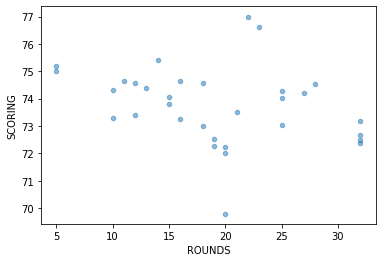

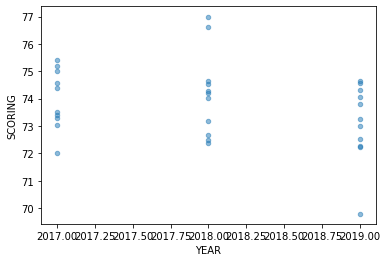

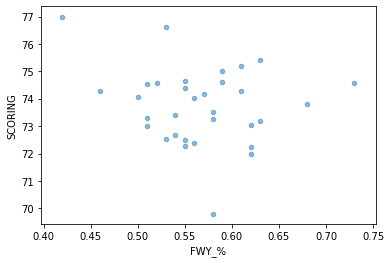

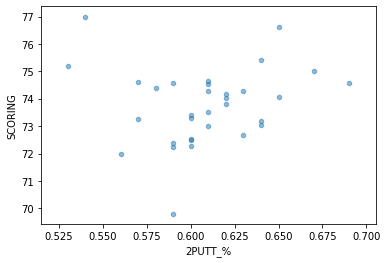

In [28]:
for predictor in df_iwu.corr()['SCORING'].abs().sort_values(ascending=False).index[1:]:
  df_iwu.plot.scatter(predictor, 'SCORING', alpha =0.5)
  plt.show()